<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº7
#### Alumno: Mateo Murgia 
#### Profesor/es: Mariano Llamedo Soria , David Benoit, Hernan Ledesma



# Introducción

El análisis de sistemas en tiempo discreto mediante la **Transformada Z** permite estudiar cómo un filtro digital responde ante señales de distintas frecuencias sin trabajar directamente en el dominio temporal. En lugar de resolver la ecuación en diferencias muestra a muestra, se utiliza el dominio complejo de **Z**, donde los desplazamientos temporales se representan como potencias de \(z^{-1}\). Esto facilita obtener la **función de transferencia**, clave para caracterizar el filtro y su comportamiento en frecuencia.

Una ecuación en diferencias de un sistema lineal e invariante en el tiempo (LTI) puede escribirse como:

$$
\sum_{k=0}^{M} a_k\, y[n-k] = \sum_{k=0}^{N} b_k\, x[n-k]
$$

Aplicando la Transformada Z (con condiciones iniciales nulas), los desplazamientos se transforman en potencias de \(z^{-1}\):

$$
\mathcal{Z}\{x[n-k]\} = z^{-k} X(z)
$$

lo que lleva a:

$$
Y(z)\sum_{k=0}^{M} a_k z^{-k} = X(z)\sum_{k=0}^{N} b_k z^{-k}
$$

De aquí se define la **función de transferencia** del sistema:

$$
T(z) = \frac{Y(z)}{X(z)} = 
\frac{\sum_{k=0}^{N} b_k z^{-k}}
     {\sum_{k=0}^{M} a_k z^{-k}}
$$

Para obtener la **respuesta en frecuencia**, se evalúa la función de transferencia sobre el eje unitario del plano Z:

$$
z = e^{j\omega}
$$

lo que produce:

$$
H(\omega) = T(e^{j\omega})
$$

A partir de esta expresión se obtienen:

- **Módulo:**  
$$|H(\omega)|$$  
Indica cuánto amplifica o atenúa el sistema cada componente frecuencial.

- **Fase:**  
$$\angle H(\omega)$$  
Describe el adelanto o retraso impuesto por el filtro a cada frecuencia.

El análisis de \(T(z)\) y \(H(\omega)\) permite identificar polos y ceros, estudiar la estabilidad del sistema y clasificar el tipo de filtro (pasa bajos, pasa altos, pasa banda o rechaza banda).


# Resolución ejercicio 1
El análisis de circuitos en el dominio de la frecuencia permite estudiar cómo un sistema eléctrico responde ante señales senoidales de distintas frecuencias.  
Utilizando el dominio de **Laplace**, los elementos pasivos se representan mediante impedancias dependientes de \( s \):

$$
Z_R = R, \quad Z_L = sL, \quad Z_C = \frac{1}{sC}
$$

y sus admitancias respectivas son:

$$
Y_R = \frac{1}{R}, \quad Y_L = \frac{1}{sL}, \quad Y_C = sC
$$

A partir de estas relaciones se modela el circuito propuesto, compuesto por dos ramas paralelas asociadas a los coeficientes \( a, b, d \).  
La salida \( V_2 \) se toma sobre la segunda rama, mientras que la entrada \( V_1 \) se aplica al conjunto completo.

---

### Planteo de la función de transferencia

$$
T(s) = \frac{V_2}{V_1} = \frac{Z_2}{Z_1 + Z_2} = \frac{Y_{1,\text{total}}}{Y_{1,\text{total}} + Y_{2,\text{total}}}
$$

---

### Cálculo de admitancias parciales

$$
Y_{1,\text{total}} = \frac{s^2 RLCa + sLd + Rb}{sLR}
$$

$$
Y_{2,\text{total}} = \frac{s^2 RLC(1 - a) + sL(1 - d) + R(1 - b)}{sLR}
$$

---

### Admitancia total y \(T(s)\)

$$
Y_{1,\text{total}} + Y_{2,\text{total}} = \frac{s^2 RLC + sL + R}{sLR}
$$

$$
T(s) = \frac{s^2 RLCa + sLd + Rb}{s^2 RLC + sL + R}
$$

---

### Normalización

$$
T(s) = \frac{s^2 a + s\frac{d}{RC} + \frac{b}{LC}}{s^2 + s\frac{1}{RC} + \frac{1}{LC}}
$$


## EJERCICIO 3: Simular y validar la respuesta en frecuencia de todos los sistemas con Numpy.





In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from numpy.fft import fft

# ============================================================================================
# Función: gráfico de módulo y fase para un filtro digital
# ============================================================================================

def plot_filtro(b, a, w_num, h_num):
    w, h = sig.freqz(b=b, a=a)

    # Fase continua
    fase      = np.unwrap(np.angle(h))
    fase_teo  = np.unwrap(np.angle(h_num))

    # ----------------------------- GRÁFICOS ----------------------------- #

    fig, ax = plt.subplots(2, 1, figsize=(8, 6))

    # Módulo
    ax[0].plot(w, 20*np.log10(np.abs(h)), label="Digital (freqz)")
    ax[0].plot(w_num, 20*np.log10(np.abs(h_num)), '--', color='orange', label="Analítico")
    ax[0].set_title("Respuesta en Módulo")
    ax[0].set_ylabel("|H(ω)| [dB]")
    ax[0].set_xlabel("Pulsación [rad/muestra]")
    ax[0].set_ylim(-50, 20)
    ax[0].grid(True)
    ax[0].legend()

    # Fase
    ax[1].plot(w, np.degrees(fase), label="Digital (freqz)")
    ax[1].plot(w_num, np.degrees(fase_teo), '--', color='orange', label="Analítico")
    ax[1].set_title("Respuesta en Fase")
    ax[1].set_ylabel("Fase [°]")
    ax[1].set_xlabel("Pulsación [rad/muestra]")
    ax[1].grid(True)
    ax[1].legend()

    plt.tight_layout()
    plt.show()


# ============================================================================================
# Coeficientes de los filtros FIR
# ============================================================================================

B_a = [1, 1, 1, 1]
B_b = [1, 1, 1, 1, 1]
B_c = [1, -1]
B_d = [1, 0, -1]

A = 1   # FIR ⇒ denominador igual a 1

# Malla de frecuencias
w = np.linspace(0, np.pi, 1000)

# ============================================================================================
# Expresiones analíticas de cada respuesta en frecuencia
# ============================================================================================

h_a = 2 * np.exp(-1j * 1.5 * w) * (np.cos(1.5*w) + np.cos(0.5*w))
h_b = np.exp(-1j * 2 * w) * (1 + 2*np.cos(w) + 2*np.cos(2*w))
h_c = 2 * np.sin(w/2) * np.exp(1j * (np.pi/2 - w/2))
h_d = 2 * np.sin(w)   * np.exp(1j * (np.pi/2 - w))








## Simulacion de respuesta en modulo y fase de sistema 1


C:\Users\mateo\AppData\Local\Temp\ipykernel_14296\174872154.py:22: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(w, 20*np.log10(np.abs(h)), label="Digital (freqz)")


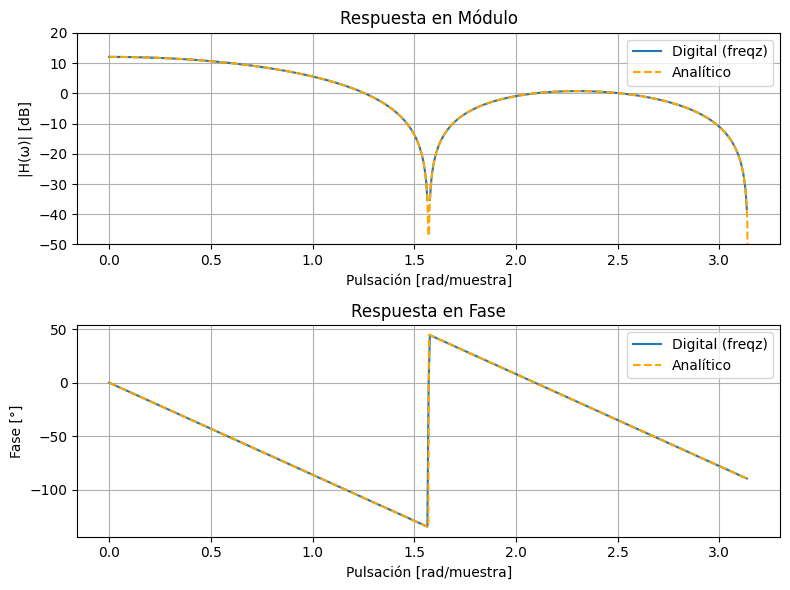

In [2]:
plot_filtro(B_a, A, w, h_a)

## Simulacion de respuesta en modulo y fase de sistema 2


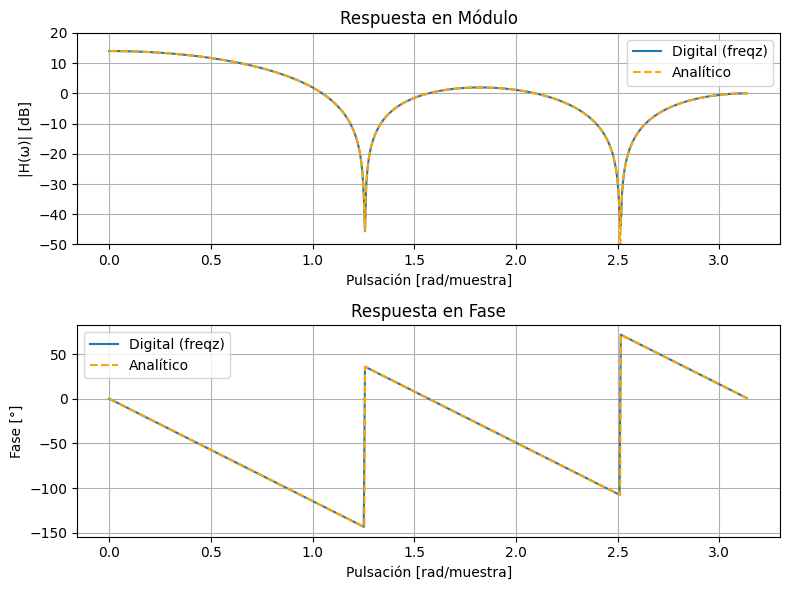

In [5]:
plot_filtro(B_b, A, w, h_b)

## Simulacion de respuesta en modulo y fase de sistema 3


C:\Users\mateo\AppData\Local\Temp\ipykernel_14296\174872154.py:22: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(w, 20*np.log10(np.abs(h)), label="Digital (freqz)")
C:\Users\mateo\AppData\Local\Temp\ipykernel_14296\174872154.py:23: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(w_num, 20*np.log10(np.abs(h_num)), '--', color='orange', label="Analítico")


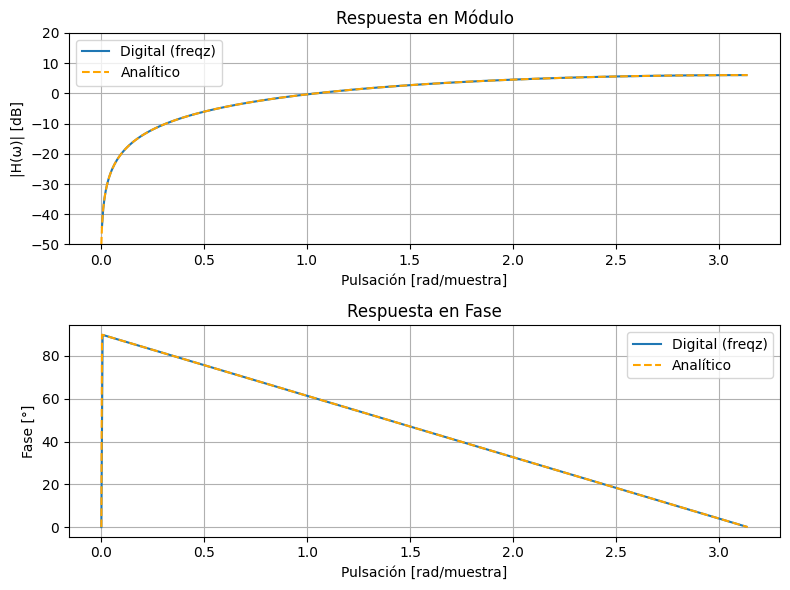

In [4]:
plot_filtro(B_c, A, w, h_c)

## Simulacion de respuesta en modulo y fase de sistema 4


C:\Users\mateo\AppData\Local\Temp\ipykernel_14296\174872154.py:22: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(w, 20*np.log10(np.abs(h)), label="Digital (freqz)")
C:\Users\mateo\AppData\Local\Temp\ipykernel_14296\174872154.py:23: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(w_num, 20*np.log10(np.abs(h_num)), '--', color='orange', label="Analítico")


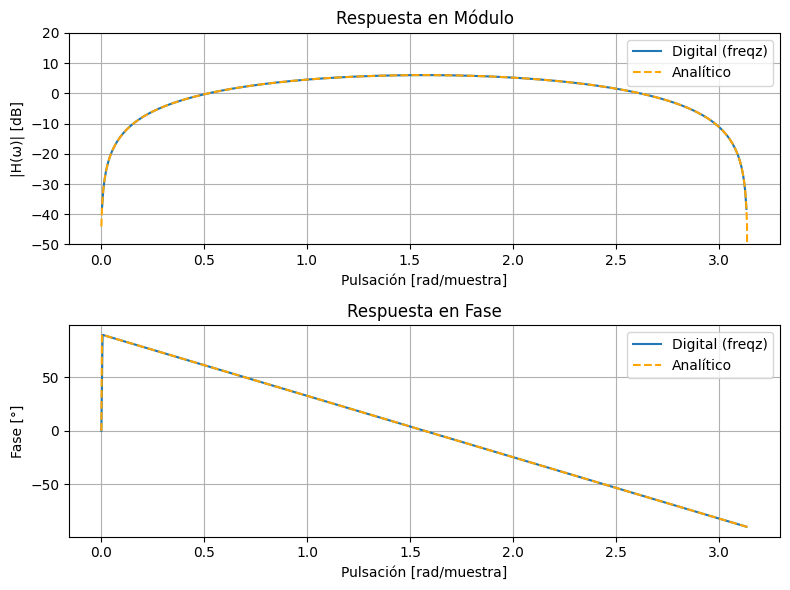

In [3]:
plot_filtro(B_d, A, w, h_d)

## Conclusiones

A lo largo del desarrollo del presente trabajo práctico se analizó el comportamiento en frecuencia de distintas redes RLC mediante la formulación de sus funciones de transferencia en el dominio de Laplace. Se observó cómo la ubicación de polos y ceros en el plano \(s\) condiciona la respuesta en frecuencia, el tipo de filtro resultante y la estabilidad del sistema.

La normalización y parametrización permitieron expresar cada función en forma de sección biquadrática (SOS), lo cual facilita su implementación modular y comprensión desde la perspectiva de diseño de filtros analógicos. Asimismo, la obtención de los parámetros \(\omega_p, \omega_z, Q_p, Q_z\) permitió cuantificar la selectividad y amortiguamiento de cada configuración.

Los gráficos del plano \(s\) resultaron particularmente útiles para visualizar tendencias: polos con parte real negativa implican estabilidad, mientras que ceros simétricos respecto al eje real afectan la atenuación en determinadas bandas de frecuencia.

En conjunto, este trabajo reforzó conceptos fundamentales de análisis de señales y sistemas lineales, y permitió relacionar directamente teoría y representación gráfica en el dominio complejo.


## Autoevaluación del aprendizaje

**Opción seleccionada:**  
✅ Resolví la tarea con seguridad

**¿Qué aprendí al hacer esta tarea?**  
Aprendí a interpretar y parametrizar funciones de transferencia de segundo orden utilizando el dominio de Laplace, identificando cómo cada componente de la red influye en las raíces del numerador y denominador. También consolidé el análisis del plano \(s\) para evaluar estabilidad, amortiguamiento y comportamiento resonante.

**¿Qué me quedó claro?**  
Quedó claro cómo:
- los coeficientes de la función de transferencia se asocian directamente a \(\omega_0\) y \(Q\),
- la ubicación de polos determina la respuesta dinámica,
- los ceros pueden introducir atenuación en bandas específicas,
- la forma SOS es útil para modularizar filtros.

**¿Qué me sigue costando?**  
Todavía requiere más práctica la interpretación rápida de cómo pequeñas variaciones de \(Q\) afectan la respuesta en banda, y la intuición sobre el efecto de ceros ubicados fuera del eje imaginario.

**¿Utilicé IA?**  
✅ Sí, utilicé IA

**¿Para qué la utilicé?**  
Selección de opciones marcadas:
- ✅ Escritura
- ✅ Conceptos teóricos
- ✅ Conclusiones
